In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.datasets import mnist
import shap

In [6]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the pixel values to range [0, 1]
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Reshape the images to (28, 28, 1) as they are grayscale
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=32)

11490434/11490434 [==============================] - 1s 0us/step
Epoch 1/5
1875/1875 [==============================] - 18s 4ms/step - loss: 0.1478 - accuracy: 0.9539
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0496 - accuracy: 0.9842
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0351 - accuracy: 0.9894
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0278 - accuracy: 0.9910
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0213 - accuracy: 0.9930


313/313 [==============================] - 1s 3ms/step - loss: 0.0328 - accuracy: 0.9900
Test accuracy: 0.9900000095367432


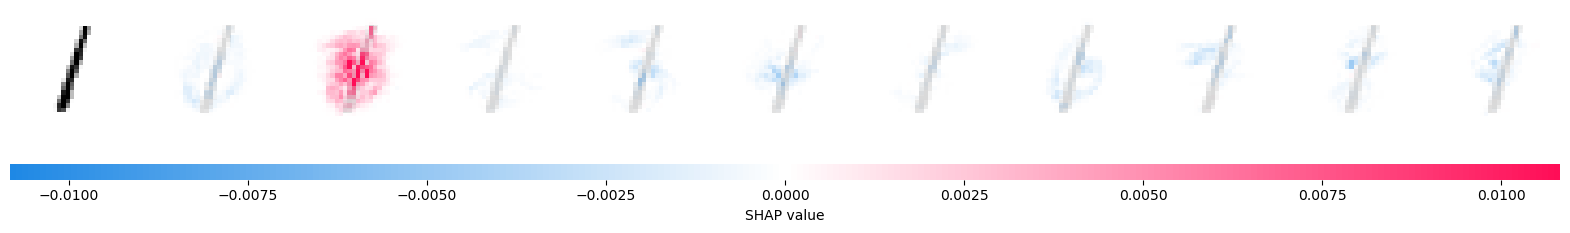

In [9]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_accuracy}')

# Choose an instance for explanation (you can change the index)
instance_idx = 2

# Create an explainer using the SHAP DeepExplainer
explainer = shap.DeepExplainer(model, train_images[:100])

# Get the explanation for the chosen instance
explanation = explainer.shap_values(test_images[instance_idx:instance_idx+1])

# Plot the explanation
shap.image_plot(explanation, -test_images[instance_idx].reshape(1, 28, 28))